<a href="https://colab.research.google.com/github/KimJunGu9/5.ML-DL/blob/main/10_%EB%B9%84%EC%A7%80%EB%8F%84_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 비지도 학습
* 비지도 학습은 기계 학습의 일종으로, 데이터가 어떻게 구성되었는지를 알아내는 문제의 범주에 속함
* 지도학습 혹은 강화학습과는 달리 입력값에 대한 목표치가 주어지지 않음
* 차원축소, 군집화, 군집화 평가

### 1-1. 차원 축소
* feature의 갯수를 줄이는 것을 포함하여 특징을 추출하는 역할을 하기도 함
* 계산 비용을 감소하는 효과
* 전반적인 데이터에 대한 이해도를 높이는 효과

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd

In [ ]:
iris = datasets.load_iris()

In [ ]:
data = iris['data']

In [ ]:
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
df = pd.DataFrame(data, columns=iris['feature_names'])

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris['target'] # 'target' : 정답데이터

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 1-2. PCA 차원축소
* PCA(주성분 분석)는 선형 차원 축소 기법
* 인기 있게 사용되는 차원 축소 기법중 하나
* 특징은 분산을 최대한 보전한다는 점
* https://excelsior-cjh.tistory.com/167

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# n_components에 1보다 작은 값을 넣으면 분산을 기준으로 차원 축소
# n_components에 1보다 큰 값을 넣으면 해당 값을 기준으로 feature를 축소
pca = PCA(n_components=2)

In [ ]:
data_scaled = StandardScaler().fit_transform(df.loc[:, 'sepal length (cm)': 'petal width (cm)'])
# 행 : 열 
# 행은 다 주고, 열은 sepal length부터 petal width까지 범위를 다 줌


In [ ]:
pca_data = pca.fit_transform(data_scaled)

In [ ]:
data_scaled[:5] # 정규분포로 데이터를 맞춰줌

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [ ]:
pca_data[:5] # 데이터 자체가 차원이 2개로 바뀌어짐(축소), 영향을 제일 많이 준 두 개의 데이터를 뽑음

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

%matplotlib inline # 아래에 그래프를 그리거나, 시각화시키는 것들을 각 %matplotlib 이 셀에 포함하겠다 (코랩은 안적어도 됨)

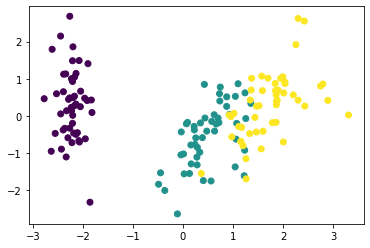

In [ ]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['target']) 
# 행은 전부, 열은 0번 
# 행은 전부, 열은 1번
# 'target'으로 구분

In [ ]:
pca = PCA(n_components=0.99)

In [ ]:
pca_data = pca.fit_transform(data_scaled)

In [ ]:
pca_data[:5] # 원래는 feature는 4개였는데 3개로 축소됨

array([[-2.26470281,  0.4800266 , -0.12770602],
       [-2.08096115, -0.67413356, -0.23460885],
       [-2.36422905, -0.34190802,  0.04420148],
       [-2.29938422, -0.59739451,  0.09129011],
       [-2.38984217,  0.64683538,  0.0157382 ]])

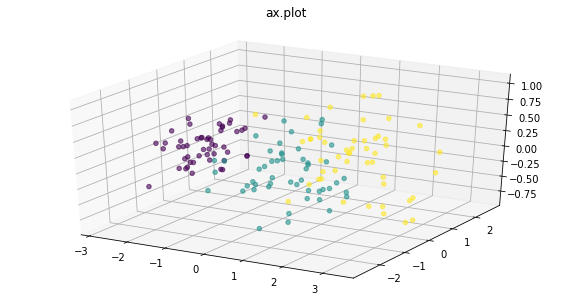

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

sample_size = 50
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], alpha=0.6, c=df['target'])
plt.savefig('./tmp.svg')
plt.title("ax.plot")
plt.show()

### 1-3. LDA 차원 축소
* LDA(Linear Discriminant Analysis): 선형 판별 분석법(PCA 유사)
* 클래스(class) 분리를 최대화하는 축을 찾기 위해 클래스 간 분산과 내부 분산의 비율을 최대화 하는 방식으로 차원 축소

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [ ]:
data_scaled = StandardScaler().fit_transform(df.loc[:, 'sepal length (cm)':'petal width (cm)'])

In [ ]:
lda_data = lda.fit_transform(data_scaled, df['target'])

In [ ]:
lda_data[:5]

array([[ 8.06179978,  0.30042062],
       [ 7.12868772, -0.78666043],
       [ 7.48982797, -0.26538449],
       [ 6.81320057, -0.67063107],
       [ 8.13230933,  0.51446253]])

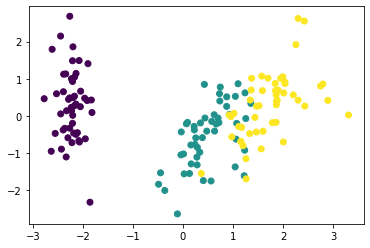

In [ ]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['target'])

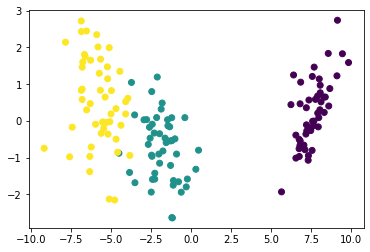

In [ ]:
plt.scatter(lda_data[:, 0], lda_data[:, 1], c=df['target'])

# 2. 군집화

### 2-1. K-Means Clustering
* 군집화에서 가장 대중적으로 사용되는 알고리즘
* centroid(군집 중심점)을 기준으로 가장 가까운 포인트들을 선택하는 기법

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3) # 알아서 3개 분류로 만들어라

In [ ]:
cluster_data = kmeans.fit_transform(df.loc[:, 'sepal length (cm)':'petal width (cm)'])

In [ ]:
cluster_data[:5]

array([[0.14135063, 3.41925061, 5.0595416 ],
       [0.44763825, 3.39857426, 5.11494335],
       [0.4171091 , 3.56935666, 5.27935534],
       [0.52533799, 3.42240962, 5.15358977],
       [0.18862662, 3.46726403, 5.10433388]])

In [ ]:
kmeans.labels_ 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


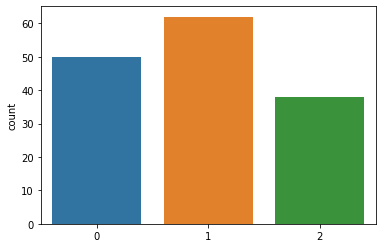

In [ ]:
sns.countplot(kmeans.labels_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


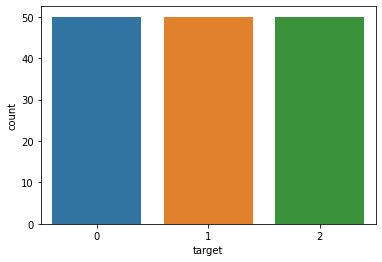

In [ ]:
sns.countplot(df['target'])

In [ ]:
kmeans

KMeans(n_clusters=3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


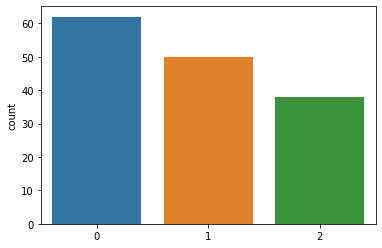

In [ ]:
# max_iter: 최대 반복 횟수, 이 횟수가 되기전 데이터의 중심점 이동이 더이상 없으면 종료
kmeans = KMeans(n_clusters=3, max_iter=500)
cluster_data = kmeans.fit_transform(df.loc[:, 'sepal length (cm)':'petal width (cm)'])
sns.countplot(kmeans.labels_)

### 2-2. DBSCAN(Density-based spatial clustering of applications with noise)
* 밀도기반 클러스터링
* 밀도가 높은 부분을 클러스터링 하는 방식
* 어느점을 기준으로 반경 x내에 점이 n개 이상 있으면 하나의 군집으로 인식하는 방식
* KMeans에서는 n_cluster의 갯수를 반드시 지정해야 주어야 하나, DBSCAN에서는 필요없음
* 기하학적인 clustering도 잘 찾아냄

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# eps(epsilon): 점 p에서 부터의 거리
# minPts: 점이 해당 숫자이상 있으면 하나의 군집으로 판단
# min_samples: 해당 숫자보다 많은 포인트가 있다면 핵심 샘플로 레이블을 할당
dbscan = DBSCAN(eps=0.3, min_samples=2)

In [ ]:
dbscan_data = dbscan.fit_predict(df.loc[:, 'sepal length (cm)':'petal width (cm)'])

In [ ]:
dbscan_data

array([ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0, -1,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  2,
        3,  2,  4,  5, -1,  3,  6,  5, -1, -1, -1, -1,  7, -1,  5,  8,  4,
        9,  4, 10, -1, -1,  7,  5,  5, -1, -1,  7, -1,  4,  4,  4, -1,  8,
       -1,  2,  9,  4,  4,  4,  7,  4,  6,  4,  4,  4,  5, -1,  4, -1, 11,
       -1, 12, -1, 13, -1, 14, -1, -1, 15, -1, 16, 11, -1, -1, 12, -1, -1,
       -1, 17, -1, 13, 10, 17, -1, 10, 10, 18, -1, 14, -1, 18, -1, -1, -1,
       19, 12, 10, 16, 17, 20, 11, 17, 17, 20, 10, 15, 19, 10])

# 3. 실루엣 스코어(군집화 평가)

* 클러스터링의 품질을 정량적으로 평가해 주는 지표
  * 1: 클러스터링의 품질이 좋음
  * 0: 클러스터링의 품질이 안좋음
  * 음수: 잘못된 분류

* [API 참고](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
score = silhouette_score(data_scaled, kmeans.labels_)

In [ ]:
score

0.44366157397640527

In [ ]:
# 각 샘플에 대한 실루엣 계수를 계산
samples = silhouette_samples(data_scaled, kmeans.labels_)

In [ ]:
samples[:5]

array([0.73318987, 0.57783809, 0.68201014, 0.62802187, 0.72693222])

In [ ]:
def plot_silhouette(X, num_cluesters):
    for n_clusters in num_cluesters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
    
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
    
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
    
            ith_cluster_silhouette_values.sort()
    
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
    
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
    
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
    
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
    
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
    
        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')
    
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')
    
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
    
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
    
        plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5817500491982808


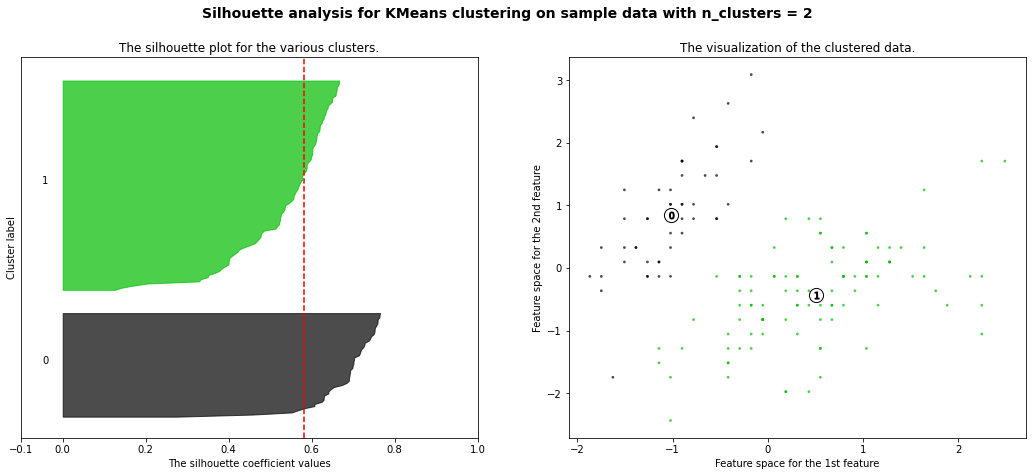

For n_clusters = 3 The average silhouette_score is : 0.45994823920518635


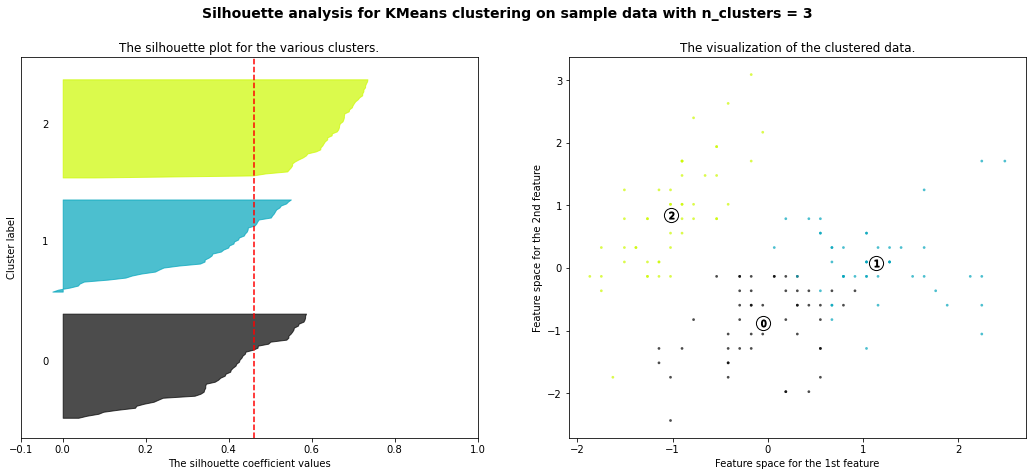

For n_clusters = 4 The average silhouette_score is : 0.383850922475103


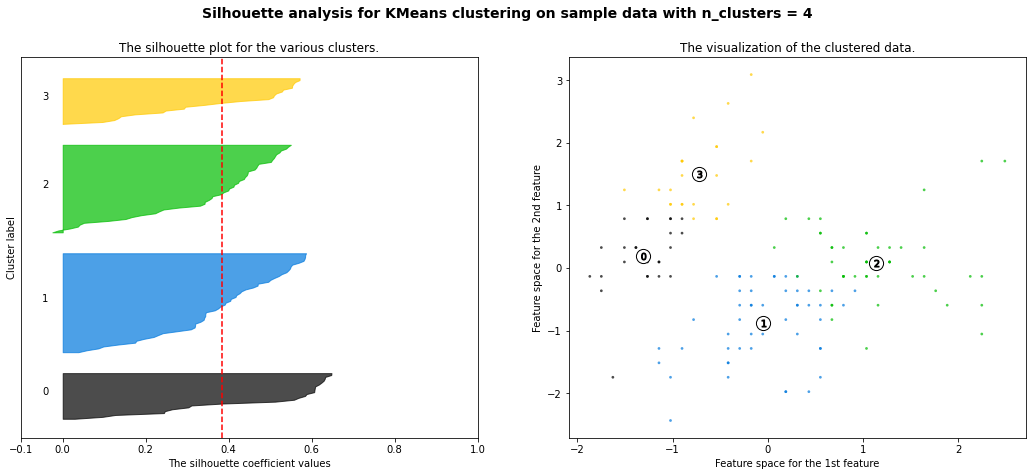

For n_clusters = 5 The average silhouette_score is : 0.34273996820787694


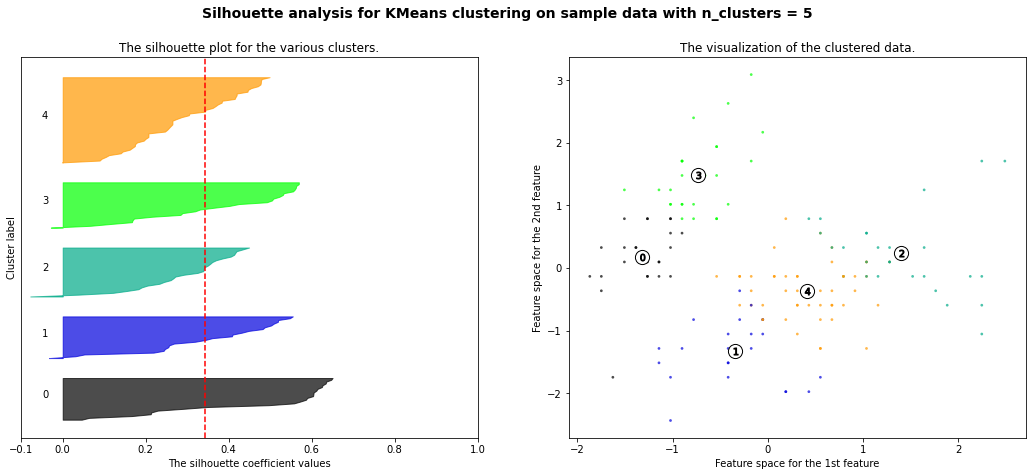

In [ ]:
# 빨간 점선은 평균 실루엣 계수를 의미
plot_silhouette(data_scaled, [2, 3, 4, 5])